In [1]:
import numpy as np

from Dataset import Neural_Data

neural_data = Neural_Data('/depot/jgmakin/data/auditory_cortex/josh_data/data',"200213")

['f_200213_Ch58_MUspk.mat', 'f_200213_Ch40_MUspk.mat', 'f_200213_Ch34_MUspk.mat', 'f_200213_Ch16_MUspk.mat', 'f_200213_Ch17_MUspk.mat', 'f_200213_Ch24_MUspk.mat', 'f_200213_Ch14_MUspk.mat', 'f_200213_Ch45_MUspk.mat', 'f_200213_Ch54_MUspk.mat', 'f_200213_Ch15_MUspk.mat', 'f_200213_Ch3p_MUspk.mat', 'f_200213_Ch62_MUspk.mat', 'f_200213_Ch4p_MUspk.mat', 'f_200213_Ch56_MUspk.mat', 'f_200213_Ch47_MUspk.mat', 'f_200213_Ch41_MUspk.mat', 'f_200213_Ch8p_MUspk.mat', 'f_200213_Ch43_MUspk.mat', 'f_200213_Ch42_MUspk.mat', 'f_200213_TRIALINFO.mat', 'f_200213_Ch7p_MUspk.mat', 'f_200213_Ch5p_MUspk.mat', 'f_200213_Ch44_MUspk.mat', 'f_200213_Ch25_MUspk.mat', 'f_200213_Ch48_MUspk.mat', 'f_200213_Ch10_MUspk.mat', 'f_200213_Ch38_MUspk.mat', 'f_200213_Ch26_MUspk.mat', 'f_200213_Ch50_MUspk.mat', 'f_200213_Ch64_MUspk.mat', 'f_200213_Ch11_MUspk.mat', 'f_200213_Ch35_MUspk.mat', 'f_200213_Ch31_MUspk.mat', 'f_200213_Ch32_MUspk.mat', 'f_200213_Ch19_MUspk.mat', 'f_200213_Ch51_MUspk.mat', 'f_200213_Ch1p_MUspk.mat', '

Clips:  0.5 0.5
2.369625


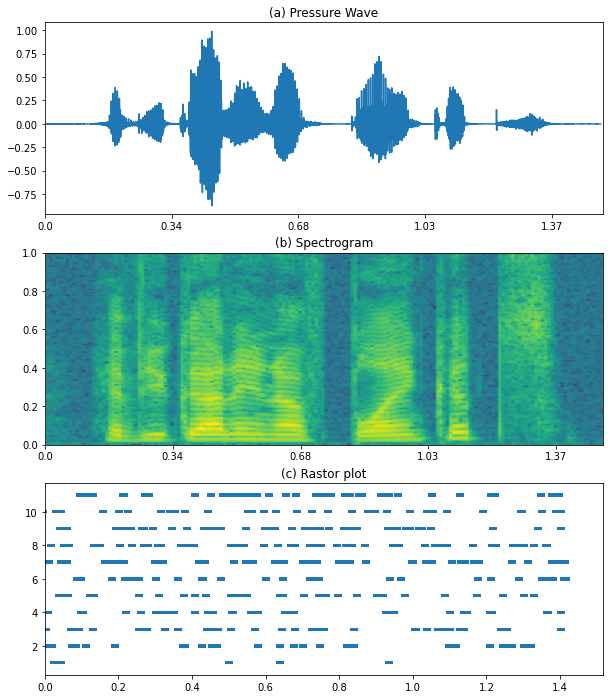

In [4]:

import matplotlib.pyplot as plt


sent_ID = 12
sent = sent_ID - 1 
sentdet = neural_data.sentdet

bef = sentdet[sent].befaft[0]
aft = sentdet[sent].befaft[1]
pw = sentdet[sent].sound
fs =  sentdet[sent].soundf

print("Clips: ", bef, aft)

pwDur = sentdet[sent].duration
print(pwDur)
spectroDur = sentdet[sent].aud.shape[1]
spectrogramPrecision = pwDur/spectroDur
befSpectro = round(bef/spectrogramPrecision)
aftSpectro = round(aft/spectrogramPrecision)

spectroTimeVec = np.linspace(0,pwDur-(bef+aft),5)
spectroTimeVec.round(decimals=2)
ticks = np.linspace(0, spectroDur-(befSpectro+aftSpectro), 5)

pwTimeVec = np.linspace(0,pwDur-(bef+aft), 5)

# neural_data.spectrogram(sent_ID)

fig, ax = plt.subplots(3,1, figsize=(10,12))
ax[0].plot(pw[int(bef*fs) : int(-aft*fs)])
# ax[0].set_xlim(0,1.5)
ax[1].specgram(pw[int(bef*fs) : int(-aft*fs)])
# ax[1].tight_layout()
# plt.xticks(ticks=np.linspace(0, spectroDur-(befSpectro+aftSpectro), 5) ,labels=spectroTimeVec.round(decimals=2))
# plt.xticks(ticks=np.linspace(0, (pwDur-(bef+aft))*fs, 5),labels=spectroTimeVec.round(decimals=2) )

plt.sca(ax[0])
plt.xticks(ticks=np.linspace(0,20000, 5),labels=spectroTimeVec.round(decimals=2))
ax[0].set_xlim(0, 22000)
ax[0].set_title("(a) Pressure Wave")

plt.sca(ax[1])
plt.xticks(ticks=np.linspace(0, 10000, 5),labels=spectroTimeVec.round(decimals=2))
ax[1].set_title("(b) Spectrogram")


trials = neural_data.get_trials(sent=12)
for i, tr in enumerate(trials):
    spikes[i] = neural_data.retrieve_spike_times(sent=12, trial=tr)[ch]
    mx = np.amax(spikes[i], axis=0)
    if mx > max_time:
        max_time = mx 
    #print(spikes[i].shape)
    ax[2].eventplot(spikes[i], lineoffsets=i+1, linelengths=0.2, linestyles='-', linewidths=8)

    ax[2].set_xlim(0,max_time+0.1)
# plt.xlabel('Time (s)', fontsize=14)
# plt.ylabel('Trials', fontsize=14)
# plt.title(f"Rastor Plot", fontsize=14, fontweight='bold')
# plt.show()
ax[2].set_title("(c) Rastor plot")

# plt.xticks(ticks=np.linspace(0, (pwDur-(bef+aft))*fs, 5),labels=spectroTimeVec.round(decimals=2) )
plt.show()

# plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red')

# np.arange(0, spectroDur-(befSpectro+aftSpectro), 1)
# print(pwDur, spectroDur, befSpectro, aftSpectro)



In [18]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import pandas as pd

dir = '/Users/akshita/Documents/Research/Makin/outputs/neuron_corr/ridge_alphas'

names = os.listdir(os.path.join(dir))


In [41]:
sub_206 = [name for name in names if '200206' in name and '.csv' not in name]
sub_206.sort(reverse=False)
print(sub_206)

['200206_80_1.0', '200206_80_2.0', '200206_80_4.0', '200206_80_5.0', '200206_80_6.0', '200206_80_8.0']


In [46]:
# tot_data = {}
import seaborn as sns

train = []
val = []
test = []
df_list = []
alphas = [1.0, 2.0, 4.0, 5.0, 6.0, 8.0]

for sub in sub_206:
    with open(os.path.join(dir, sub)) as f:
        data = json.load(f)
    num_channels = len(data)
    nan_channels = 0
    # print(num_channels)
    train = []
    val = []
    test = []
    for i in list(data.keys()):
        if np.isnan(np.sum(data[i]['train'] +  data[i]['val'] + data[i]['test'])):
            nan_channels+=1
            del data[i]
    # print(nan_channels)
        else:
            # print(data[i]['train'])
            train.append(np.max(data[i]['train']))
            val.append(np.max(data[i]['val']))
            test.append(np.max(data[i]['test']))
    name = sub.split('_')

        # print(train)
        # tot_data[name.strip('_80.csv')] = {'train': train, 'val': val, 'test': test}
        
    # sub_list = [name[0]]*len(train)
    sub_list = [str(float(name[2])/10)]*len(train)
    train_dict = {'subject': sub_list, 'data': train, 'type': ['train']*len(train)}
    df_train = pd.DataFrame(train_dict)
    df_list.append(df_train)
    val_dict = {'subject': sub_list, 'data': val, 'type': ['val']*len(val)}
    df_val = pd.DataFrame(val_dict)
    df_list.append(df_val)
    test_dict = {'subject': sub_list, 'data': test, 'type': ['test']*len(test)}
    df_test =  pd.DataFrame(test_dict)
    df_list.append(df_test)


with open('/Users/akshita/Documents/Research/Makin/outputs/neuron_corr/ridge/200206_80') as f:
        data = json.load(f)

num_channels = len(data)
nan_channels = 0
# print(num_channels)
train = []
val = []
test = []
for i in list(data.keys()):
    if np.isnan(np.sum(data[i]['train'] +  data[i]['val'] + data[i]['test'])):
        nan_channels+=1
        del data[i]
# print(nan_channels)
    else:
        # print(data[i]['train'])
        train.append(np.max(data[i]['train']))
        val.append(np.max(data[i]['val']))
        test.append(np.max(data[i]['test']))
name = sub.split('_')

    # print(train)
    # tot_data[name.strip('_80.csv')] = {'train': train, 'val': val, 'test': test}
    
# sub_list = [name[0]]*len(train)
sub_list = ['1']*len(train)
train_dict = {'subject': sub_list, 'data': train, 'type': ['train']*len(train)}
df_train = pd.DataFrame(train_dict)
df_list.append(df_train)
val_dict = {'subject': sub_list, 'data': val, 'type': ['val']*len(val)}
df_val = pd.DataFrame(val_dict)
df_list.append(df_val)
test_dict = {'subject': sub_list, 'data': test, 'type': ['test']*len(test)}
df_test =  pd.DataFrame(test_dict)
df_list.append(df_test)

Text(0.5, 1.0, 'Ridge over 200206 for varying alpha')

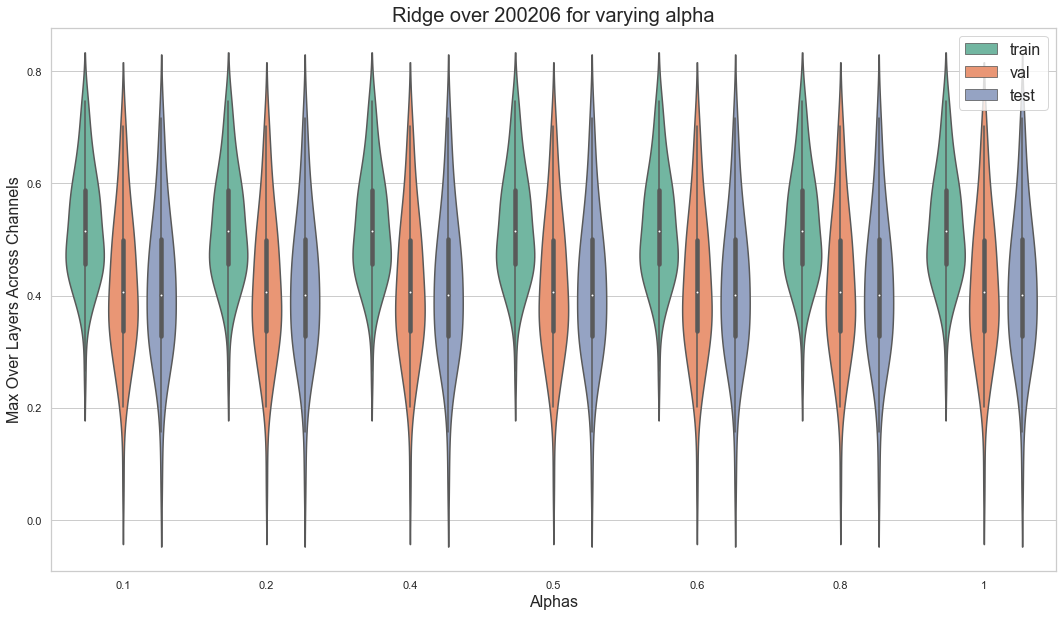

In [47]:
df = pd.DataFrame()
tot_df = df.append(df_list)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.violinplot(x="subject", y="data",hue='type', data=tot_df,palette="Set2")
plt.xlabel("Alphas", fontsize=16)
plt.ylabel("Max Over Layers Across Channels", fontsize=16)
plt.legend(fontsize=16)
plt.title("Ridge over 200206 for varying alpha", fontsize=20)
# plt.savefig("/Users/akshita/Documents/Research/Makin/outputs/bar_violin_plots/" +"violin_plot_OLS.png")

In [49]:
np.arange(1,10).tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

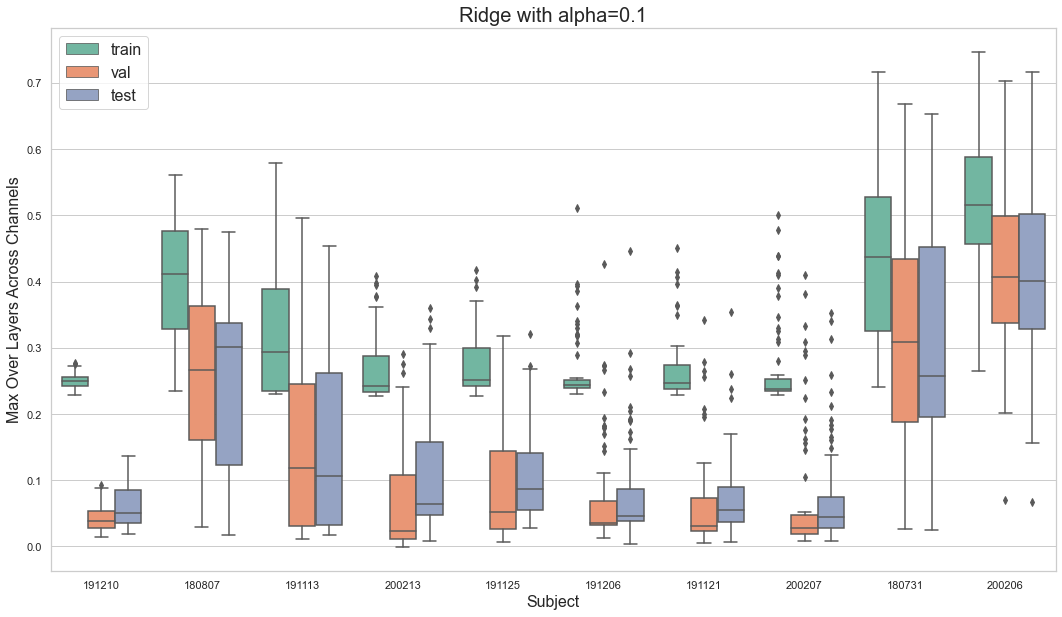

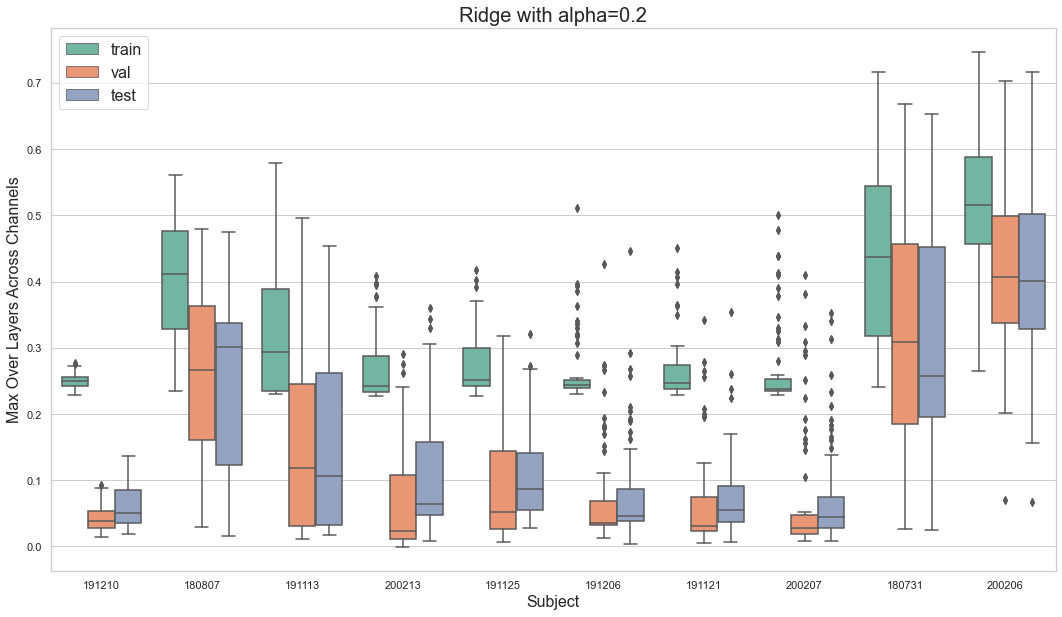

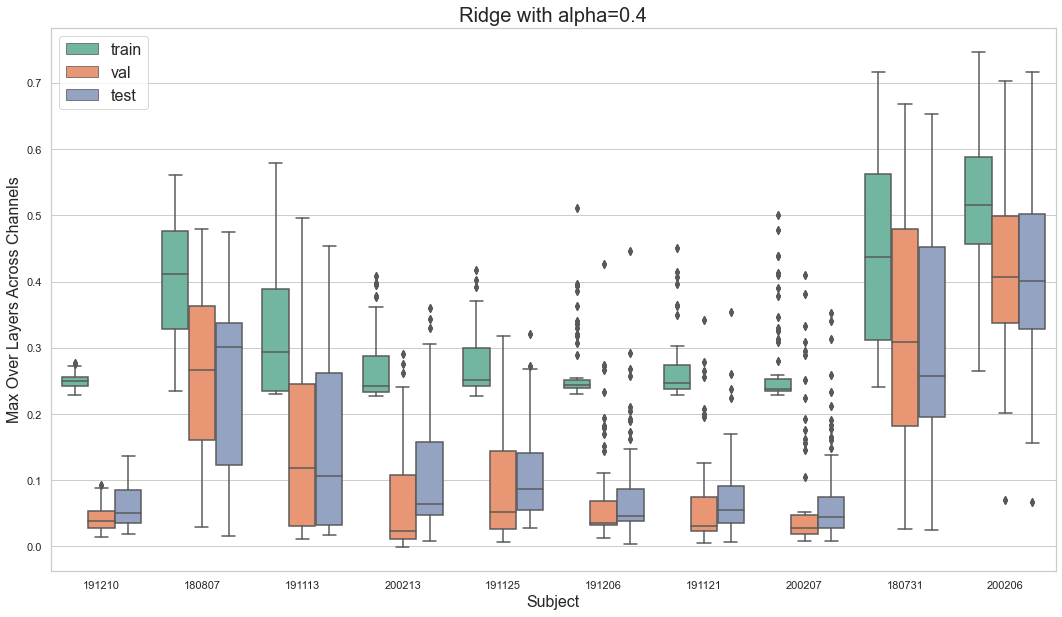

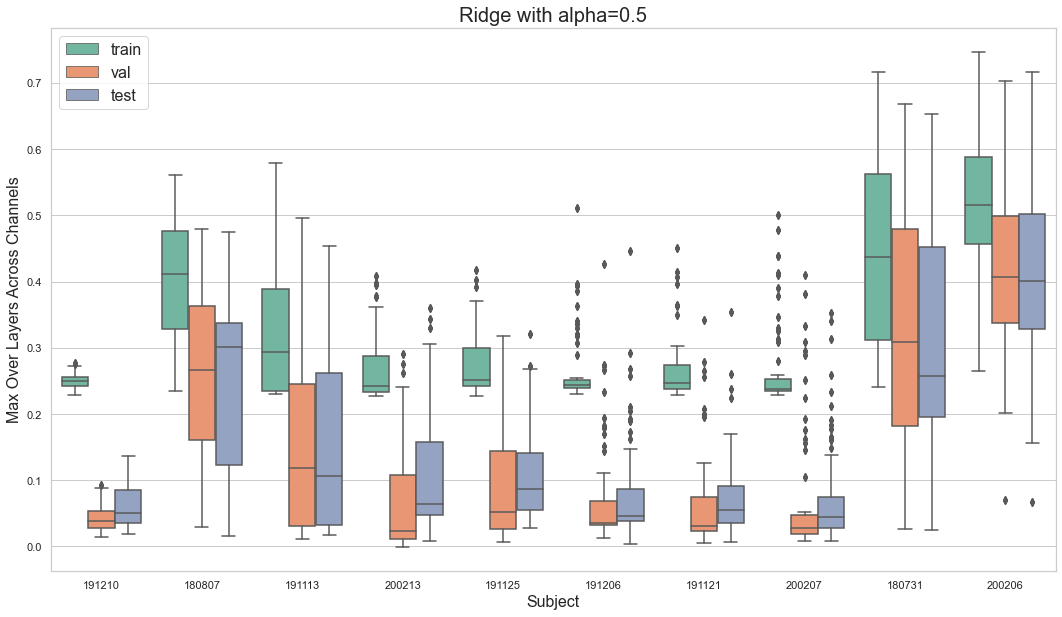

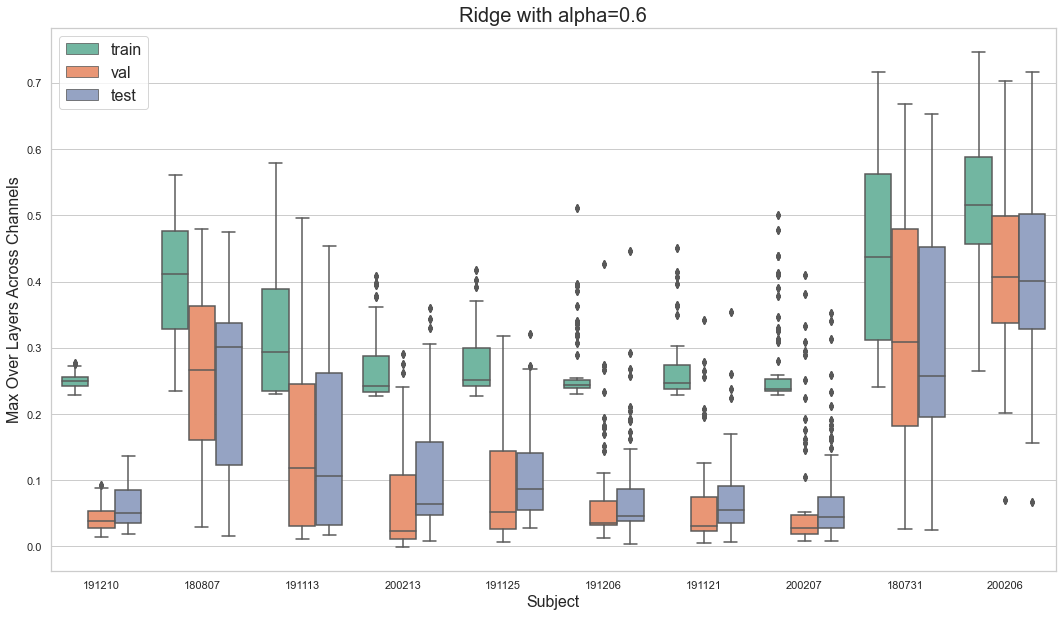

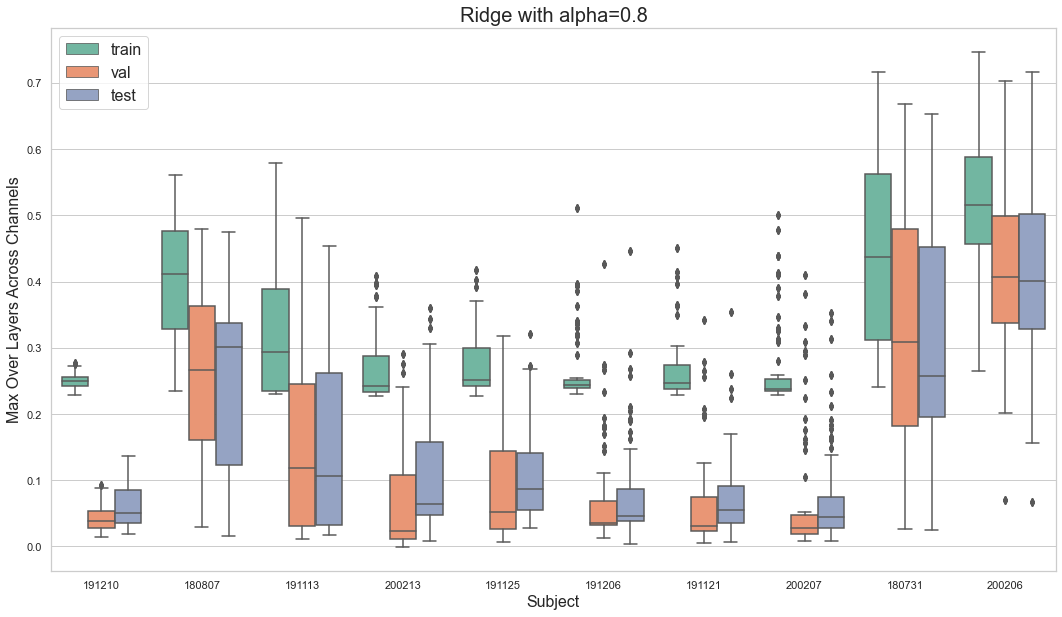

In [21]:
# tot_data = {}
import seaborn as sns

train = []
val = []
test = []
df_list = []
alphas = [1.0, 2.0, 4.0, 5.0, 6.0, 8.0]


    # df = pd.DataFrame()
for alpha in alphas:
    for name in names:
        # if str(alpha) not in name:
            # break
        if str(alpha) in name and '.csv' not in name:
            with open(os.path.join(dir, name)) as f:
                data = json.load(f)
            # data = pd.read_csv(os.path.join(dir, name), header=None)
            # data.columns = [i for i in range(12)]
            
            num_channels = len(data)
            nan_channels = 0
            # print(num_channels)
            train = []
            val = []
            test = []
            for i in list(data.keys()):
                if np.isnan(np.sum(data[i]['train'] +  data[i]['val'] + data[i]['test'])):
                    nan_channels+=1
                    del data[i]
            # print(nan_channels)
                else:
                    # print(data[i]['train'])
                    train.append(np.max(data[i]['train']))
                    val.append(np.max(data[i]['val']))
                    test.append(np.max(data[i]['test']))

        # k = name - '.csv'
            sub = name.split('_')[0]

        # print(train)
        # tot_data[name.strip('_80.csv')] = {'train': train, 'val': val, 'test': test}
        
            sub_list = [sub]*len(train)
            train_dict = {'subject': sub_list, 'data': train, 'type': ['train']*len(train)}
            df_train = pd.DataFrame(train_dict)
            df_list.append(df_train)
            val_dict = {'subject': sub_list, 'data': val, 'type': ['val']*len(val)}
            df_val = pd.DataFrame(val_dict)
            df_list.append(df_val)
            test_dict = {'subject': sub_list, 'data': test, 'type': ['test']*len(test)}
            df_test =  pd.DataFrame(test_dict)
            df_list.append(df_test)
    
    df = pd.DataFrame()
    tot_df = df.append(df_list)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(18, 10))
    sns.boxplot(x="subject", y="data",hue='type', data=tot_df,palette="Set2")
    plt.xlabel("Subject", fontsize=16)
    plt.ylabel("Max Over Layers Across Channels", fontsize=16)
    plt.legend(fontsize=16)
    plt.title(f"Ridge with alpha={alpha/10}", fontsize=20)
plt.show()

    # df['subject'] = sub_list
    # df['data'] = train
    # df['type'] = ['train']*len(train)
    # df_list.append(df)
    # df.empty()
    # df['subject'] = sub_list
    # df['data'] = val
    # df['type'] = ['val']*len(val)
    # df_list.append(df)
    # df.empty()
    # df['subject'] = sub_list
    # df['data'] = test
    # df['type'] = ['test']*len(test)
    # df_list.append(df)



         
        # plt.figure(figsize=(10,8))
        # plt.plot(np.mean(train, axis=0), '-o',color='slateblue', label='train')
        # plt.plot(np.max(train, axis=0), '-.',color='slateblue')
        # plt.plot(np.min(train, axis=0), '-.',color='slateblue')
        # plt.plot(np.mean(val, axis=0), '-o', color='crimson', label='val')
        # plt.plot(np.max(val, axis=0), '-.', color='crimson')
        # plt.plot(np.min(val, axis=0), '-.', color='crimson')
        # plt.plot(np.mean(test, axis=0), '-o', color='seagreen', label='test')
        # plt.plot(np.max(test, axis=0), '-.', color='seagreen')
        # plt.plot(np.min(test, axis=0), '-.', color='seagreen')

        # plt.grid()
        # plt.legend()
        # plt.title(f"Avg across {num_channels}-{nan_channels} channels {name} without SP", fontsize=16)
        # plt.savefig("/Users/akshita/Documents/Research/Makin/outputs/without_SP/"+ name +".png")

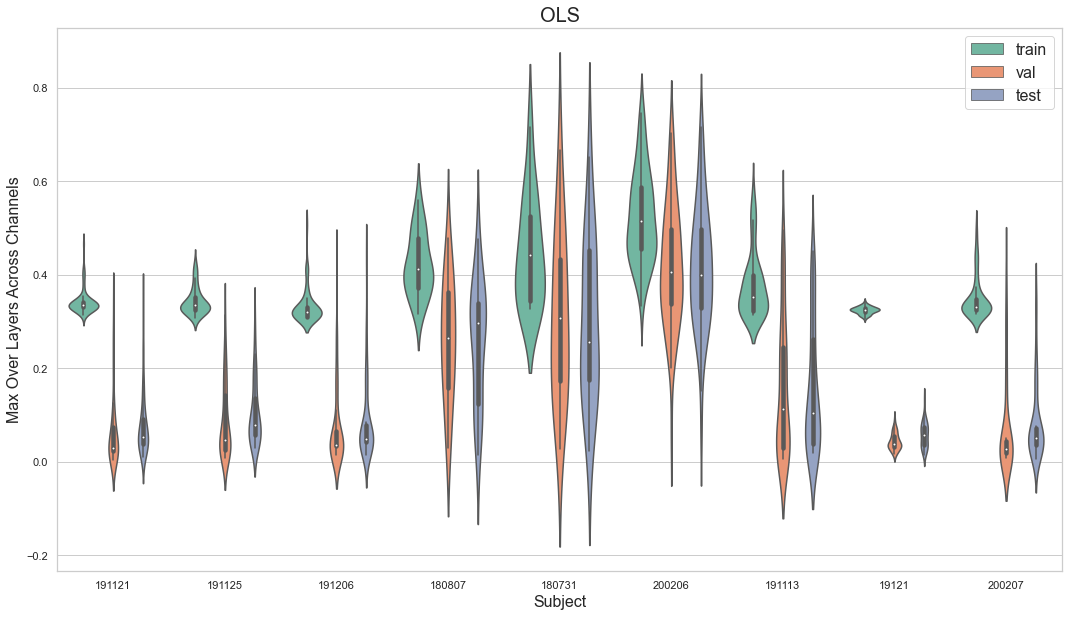

In [39]:
df = pd.DataFrame()
tot_df = df.append(df_list)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.violinplot(x="subject", y="data",hue='type', data=tot_df,palette="Set2")
plt.xlabel("Subject", fontsize=16)
plt.ylabel("Max Over Layers Across Channels", fontsize=16)
plt.legend(fontsize=16)
plt.title("OLS", fontsize=20)
plt.savefig("/Users/akshita/Documents/Research/Makin/outputs/bar_violin_plots/" +"violin_plot_OLS.png")

In [ ]:
# train = []
# val = []
# test = []
# for sub in tot_data:
#     train.append(tot_data[sub]['train'])
#     val.append(tot_data[sub]['val'])
#     test.append(tot_data[sub]['test'])
    
# plt.figure(figsize=(15,10))

# # np.var(train, axis=1)
# plt.errorbar(list(tot_data.keys()),np.mean(train, axis=1), yerr=np.std(train, axis=1), color='slateblue', label='train', ecolor='blue')
# # plt.plot(list(tot_data.keys()), np.max(train, axis=1), '-.',color='slateblue')
# # plt.plot(list(tot_data.keys()), np.min(train, axis=1), '-.',color='slateblue')
# plt.errorbar(list(tot_data.keys()), np.mean(val, axis=1), yerr=np.std(val, axis=1), color='crimson', label='val', ecolor='red')
# # plt.plot(np.max(val, axis=1), '-.', color='crimson')
# # plt.plot(np.min(val, axis=1), '-.', color='crimson')
# plt.errorbar(list(tot_data.keys()),np.mean(test, axis=1), yerr=np.std(test, axis=1), color='seagreen', label='test')
# # plt.plot(np.max(test, axis=0), '-.', color='seagreen')
# # plt.plot(np.min(test, axis=0), '-.', color='seagreen')

# plt.title("Different Sessions",fontsize=18)
# plt.ylabel("Avg Correlation Across Layers", fontsize=16)
# plt.xlabel("Session Dates", fontsize=16)
# plt.grid()
# plt.legend()
# plt.show()